# Prediksi Nilai Matematika Berdasarkan Jam Belajar
Proyek ini menggunakan regresi linear sederhana untuk menganalisis hubungan antara jam belajar per minggu (X) dan nilai matematika (y). Dataset yang digunakan berisi data performa akademik siswa dengan berbagai metrik pembelajaran.

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import joblib


In [2]:
# Memuat dataset dari file CSV
df = pd.read_csv("../data/student-scores.csv")

# Menampilkan 5 baris pertama
print("=== 5 Baris Pertama ===")
print(df.head())

# Cek nama kolom
print("\n=== Nama Kolom ===")
print(df.columns)


=== 5 Baris Pertama ===
   id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73     

In [3]:
# Cek Informasi Dataset
# Melihat tipe data dan missing values
print("=== Info Dataset ===")
print(df.info())

# Cek jumlah data hilang
print("\n=== Jumlah Missing Values ===")
print(df.isnull().sum())


=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score            

In [4]:
# Variabel independen (X) dan dependen (y)
X = df[['weekly_self_study_hours']]  # pastikan kolom sesuai
y = df['math_score']

print("Contoh nilai X:\n", X.head())
print("\nContoh nilai y:\n", y.head())


Contoh nilai X:
    weekly_self_study_hours
0                       27
1                       47
2                       13
3                        3
4                       10

Contoh nilai y:
 0    73
1    90
2    81
3    71
4    84
Name: math_score, dtype: int64


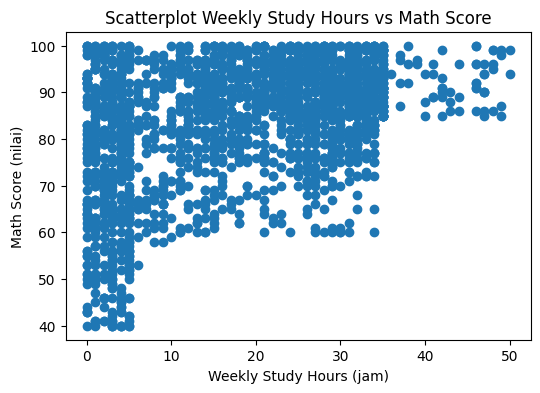

In [5]:
# Scatterplot (Validasi Linearitas)
import os
os.makedirs('../static', exist_ok=True)

plt.figure(figsize=(6,4))
plt.scatter(X, y)
plt.xlabel("Weekly Study Hours (jam)")
plt.ylabel("Math Score (nilai)")
plt.title("Scatterplot Weekly Study Hours vs Math Score")
plt.savefig('../static/ta2_scatter.png', dpi=150, bbox_inches='tight')
plt.show()


In [6]:
# Cek ringkasan statistik
# Ambil hanya kolom yang relevan
df_filtered = df[['weekly_self_study_hours', 'math_score']].copy()

# Hitung IQR
Q1 = df_filtered.quantile(0.25)
Q3 = df_filtered.quantile(0.75)
IQR = Q3 - Q1

# Filter outlier berdasarkan IQR
condition = ~(
    (df_filtered < (Q1 - 1.5 * IQR)) |
    (df_filtered > (Q3 + 1.5 * IQR))
).any(axis=1)

filtered_df = df[condition]

print("Jumlah data awal :", len(df))
print("Jumlah setelah filter:", len(filtered_df))

# Update variabel untuk modeling
df = filtered_df
X = df[['weekly_self_study_hours']]
y = df['math_score']


Jumlah data awal : 2000
Jumlah setelah filter: 1930


In [7]:
# Split Data (Train & Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))


Jumlah data train: 1544
Jumlah data test: 386


In [8]:
# Training Model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model berhasil dilatih.")
print("Intercept  :", model.intercept_)
print("Koefisien :", model.coef_[0])


Model berhasil dilatih.
Intercept  : 79.24478563369551
Koefisien : 0.29589889322451557


In [9]:
# Evaluasi Model
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("=== Evaluasi Model ===")
print("R-squared :", r2)
print("RMSE      :", rmse)


=== Evaluasi Model ===
R-squared : 0.13334327817192548
RMSE      : 10.352127851809506


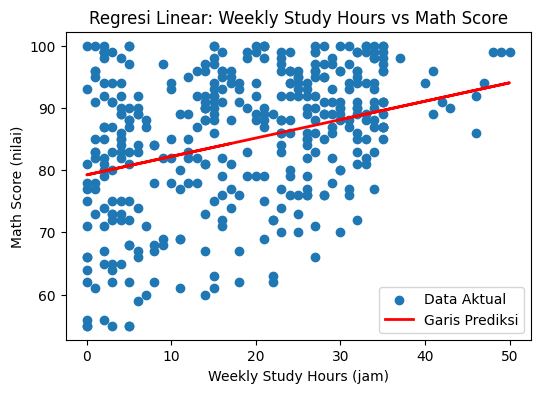

In [10]:
# Visualisasi Garis Regresi
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, label="Data Aktual")
plt.plot(X_test, y_pred, color="red", label="Garis Prediksi", linewidth=2)
plt.xlabel("Weekly Study Hours (jam)")
plt.ylabel("Math Score (nilai)")
plt.title("Regresi Linear: Weekly Study Hours vs Math Score")
plt.legend()
plt.savefig('../static/ta2_regression.png', dpi=150, bbox_inches='tight')
plt.show()


In [11]:
# Simpan Model
joblib.dump(model, "../models/model.pkl")
print("Model disimpan sebagai model.pkl")


Model disimpan sebagai model.pkl


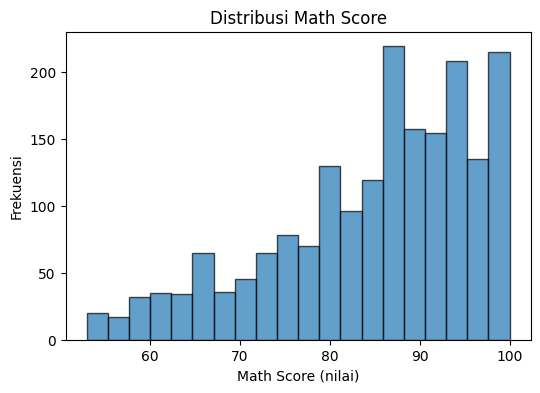

In [12]:
# Histogram Distribusi Math Score (Y)
plt.figure(figsize=(6,4))
plt.hist(y, bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribusi Math Score")
plt.xlabel("Math Score (nilai)")
plt.ylabel("Frekuensi")
plt.savefig('../static/ta2_histogram_y.png', dpi=150, bbox_inches='tight')
plt.show()


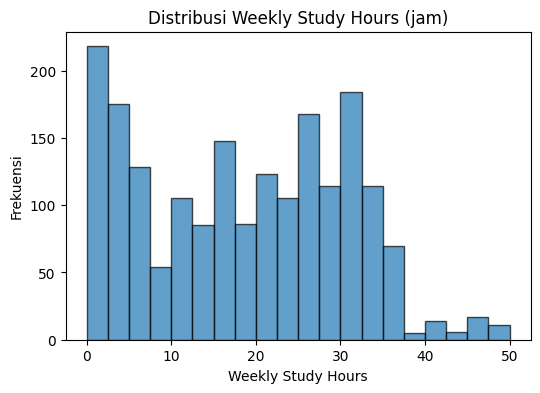

In [13]:
# Histogram Distribusi Weekly Study Hours (X)
plt.figure(figsize=(6,4))
plt.hist(X, bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribusi Weekly Study Hours (jam)")
plt.xlabel("Weekly Study Hours")
plt.ylabel("Frekuensi")
plt.savefig('../static/ta2_histogram_x.png', dpi=150, bbox_inches='tight')
plt.show()


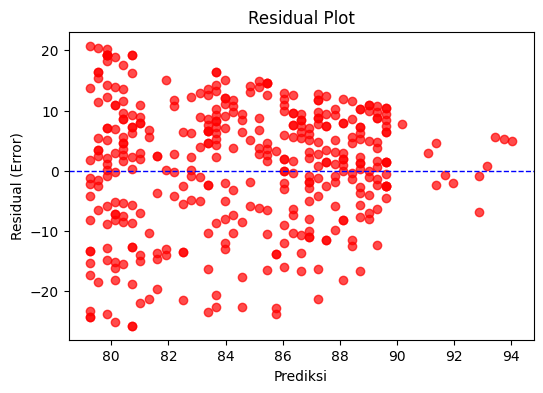

In [14]:
# Residual Plot (Error Visual)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.7, color="red")  # titik residual merah
plt.axhline(0, color="blue", linestyle="--", linewidth=1)  # garis acuan hitam biar kontras
plt.title("Residual Plot")
plt.xlabel("Prediksi")
plt.ylabel("Residual (Error)")
plt.savefig('../static/ta2_residual.png', dpi=150, bbox_inches='tight')
plt.show()


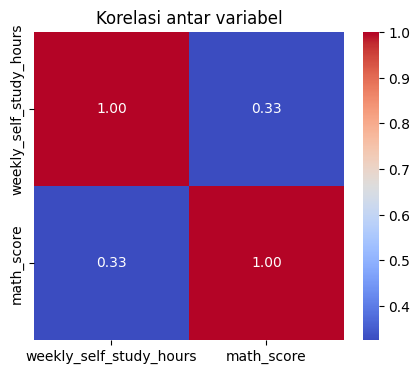

In [15]:
# Heatmap Korelasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(df[['weekly_self_study_hours', 'math_score']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar variabel")
plt.savefig('../static/ta2_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()


In [16]:
# === 8) Ringkasan Akhir ===
print("\n🎉 RINGKASAN AKHIR")
print("=" * 50)
print("✅ Analisis regresi linear selesai!")
print("✅ Model berhasil dilatih dan dievaluasi")
print("✅ File tersimpan:")
print("   • ../models/model.pkl")
print("   • ../static/regression_scatter.png")
print("   • ../static/regression_result.png")

# Pastikan variabel sudah terdefinisi
if 'performance' in locals() and 'r2' in locals():
    print(f"\n📊 Performa Model: {performance} (R² = {r2*100:.1f}%)")
    print(f"📈 Persamaan: Math Score = {model.intercept_:.2f} + {model.coef_[0]:.2f} × Weekly Study Hours")
else:
    print(f"\n📊 Model Parameters:")
    print(f"• Intercept: {model.intercept_:.2f}")
    print(f"• Coefficient: {model.coef_[0]:.2f}")
    print(f"📈 Persamaan: Math Score = {model.intercept_:.2f} + {model.coef_[0]:.2f} × Weekly Study Hours")

print("\n🎯 Model siap digunakan untuk prediksi nilai ujian berdasarkan jam belajar!")



🎉 RINGKASAN AKHIR
✅ Analisis regresi linear selesai!
✅ Model berhasil dilatih dan dievaluasi
✅ File tersimpan:
   • ../models/model.pkl
   • ../static/regression_scatter.png
   • ../static/regression_result.png

📊 Model Parameters:
• Intercept: 79.24
• Coefficient: 0.30
📈 Persamaan: Math Score = 79.24 + 0.30 × Weekly Study Hours

🎯 Model siap digunakan untuk prediksi nilai ujian berdasarkan jam belajar!
